In [59]:
try:

    import tensorflow as tf
    import cv2
    import os
    import pickle
    import numpy as np
    print("Library Loaded Successfully ..........")
except:
    print("Library not Found ! ")


class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path,cv2.IMREAD_GRAYSCALE)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 1)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data














Library Loaded Successfully ..........


In [60]:
if __name__ == "__main__":
    path = '/Users/glennhubbard/Documents/GitHub/Smart-Library-to-load-image-Dataset-for-Convolution-Neural-Network-Tensorflow-Keras-/training_set'
    a = MasterImage(PATH=path,
                    IMAGE_SIZE=80)

    X_Data,Y_Data = a.load_dataset()
    print(X_Data.shape)


Reading Dataset from PIckle Object
(8000, 80, 80, 1)


In [61]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D



XXX=X_Data[0:2000]
YYY=Y_Data[0:2000]


model=Sequential()
model.add(Conv2D(150, (3,3), input_shape=XXX.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(75,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

model.fit(XXX,YYY,batch_size=60, epochs=1, validation_split=0.1)  
loss, acc = model.evaluate(XXX, YYY, verbose=2)
model.save("/Users/glennhubbard/Documents/GitHub/Smart-Library-to-load-image-Dataset-for-Convolution-Neural-Network-Tensorflow-Keras-/models/Monitoring.h5")


 


30/30 [==============================] - 21s 660ms/step - loss: 0.0227 - accuracy: 0.9972 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
63/63 - 5s - loss: 7.2471e-29 - accuracy: 1.0000 - 5s/epoch - 78ms/step


2/2 [==============================] - 2s 556ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
4/4 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 266ms/epoch - 67ms/step


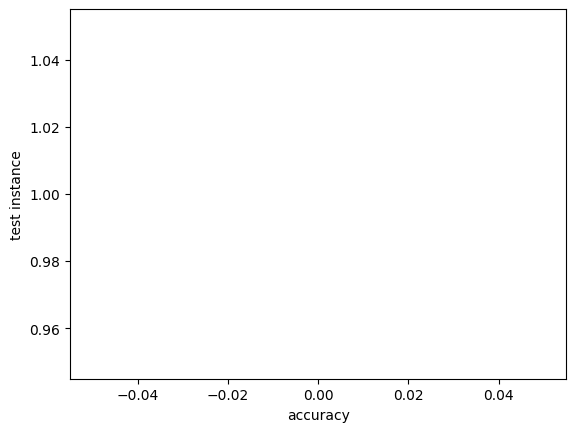

2/2 [==============================] - 1s 429ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
4/4 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 276ms/epoch - 69ms/step


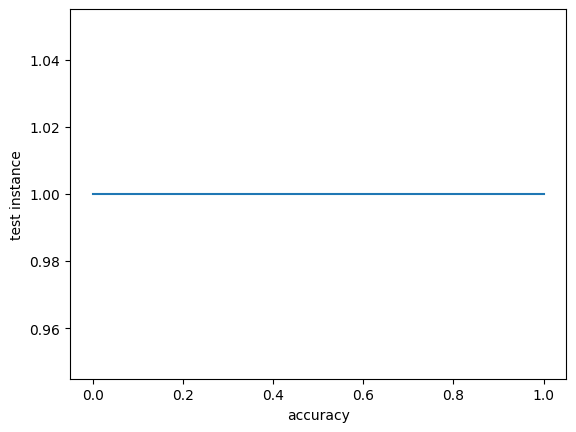

2/2 [==============================] - 1s 376ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
3/3 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 248ms/epoch - 83ms/step


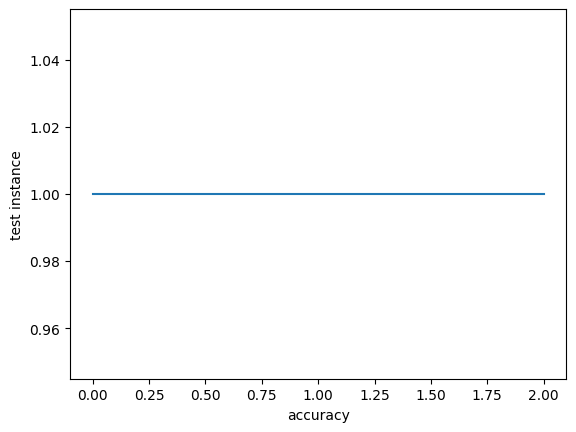

2/2 [==============================] - 2s 458ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
3/3 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 618ms/epoch - 206ms/step


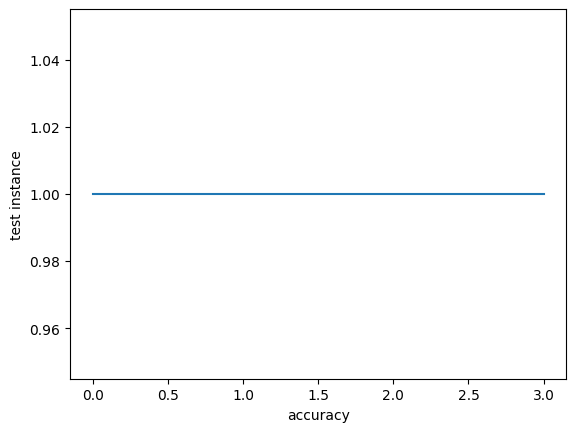

2/2 [==============================] - 1s 434ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
3/3 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 397ms/epoch - 132ms/step


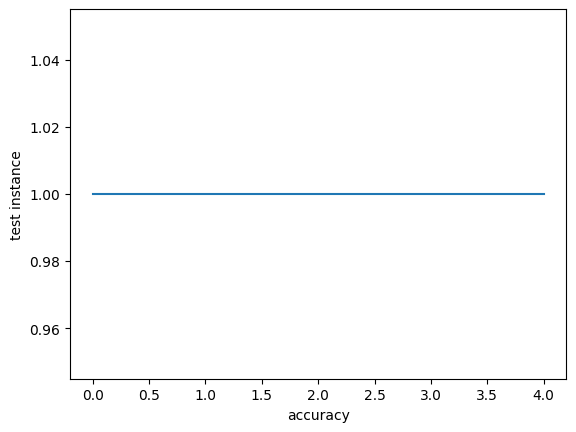

2/2 [==============================] - 1s 250ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
3/3 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 373ms/epoch - 124ms/step


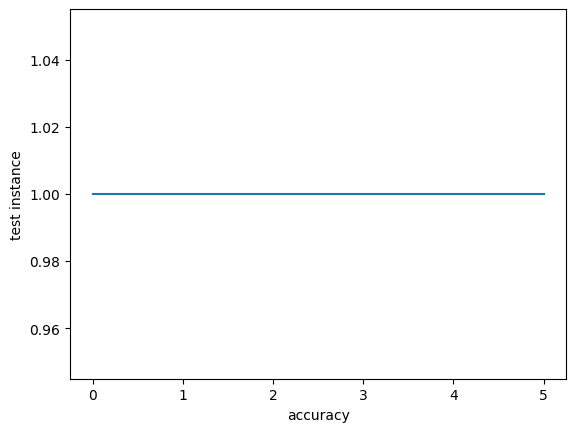

2/2 [==============================] - 1s 178ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
3/3 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 231ms/epoch - 77ms/step


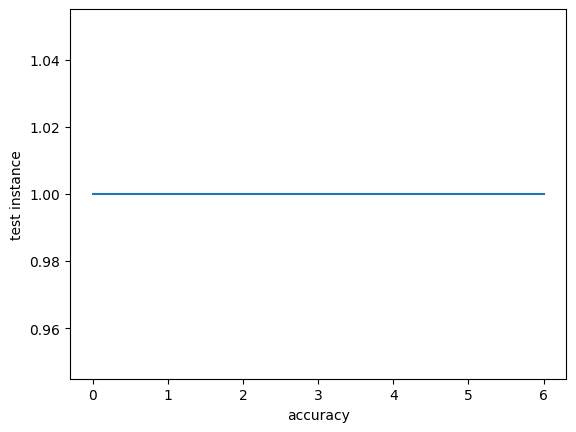

KeyboardInterrupt: 

In [62]:
my_model = tf.keras.models.load_model("/Users/glennhubbard/Documents/GitHub/Smart-Library-to-load-image-Dataset-for-Convolution-Neural-Network-Tensorflow-Keras-/models/Monitoring.h5")
import matplotlib.pyplot as plt

XXX= X_Data[2001:4000]
YYY= Y_Data[2001:4000]
i=1
acc_storage=[]
while i <20:
    XXX= XXX[i:i*100]
    YYY= YYY[i:i*100]
    my_model.fit(XXX,YYY,batch_size=60, epochs=1, validation_split=0.1)  
    loss, acc = my_model.evaluate(XXX, YYY, verbose=2)

    acc_storage.append(acc)

    plt.plot(acc_storage)
    plt.xlabel("accuracy")
    plt.ylabel("test instance")  
    plt.show()


    i+=1

